In [2]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_LZdllcl.csv -O train.csv

!wget https://datahack-prod.s3.amazonaws.com/test_file/test_2umaH9m.csv -O test.csv

!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_M0L0uXE.csv -O sample_submission.csv


Redirecting output to ‘wget-log’.

Redirecting output to ‘wget-log.1’.

Redirecting output to ‘wget-log.2’.


**Importing Data**

In [3]:
!ls

sample_data	       test.csv   wget-log    wget-log.2
sample_submission.csv  train.csv  wget-log.1


In [0]:
# Import the required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [0]:
# Read the train and test data
train=pd.read_csv("train.csv")
train.drop('employee_id',inplace=True,axis = 1)
test=pd.read_csv("test.csv")

In [3]:
# Check the variables in train data
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [4]:
# Print datatype of each variable
train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [5]:
# Dimension of the train dataset
train.shape

(54808, 13)

In [6]:
# Print the head of train dataset
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
# Unique values in each variable of train dataset
train.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

### Univariate Analysis

#### Target Variable

In [8]:
train['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [0]:
# Around 91% trainee have promoted
# Unbalanced dataset 

#### Categorical Independent Variables

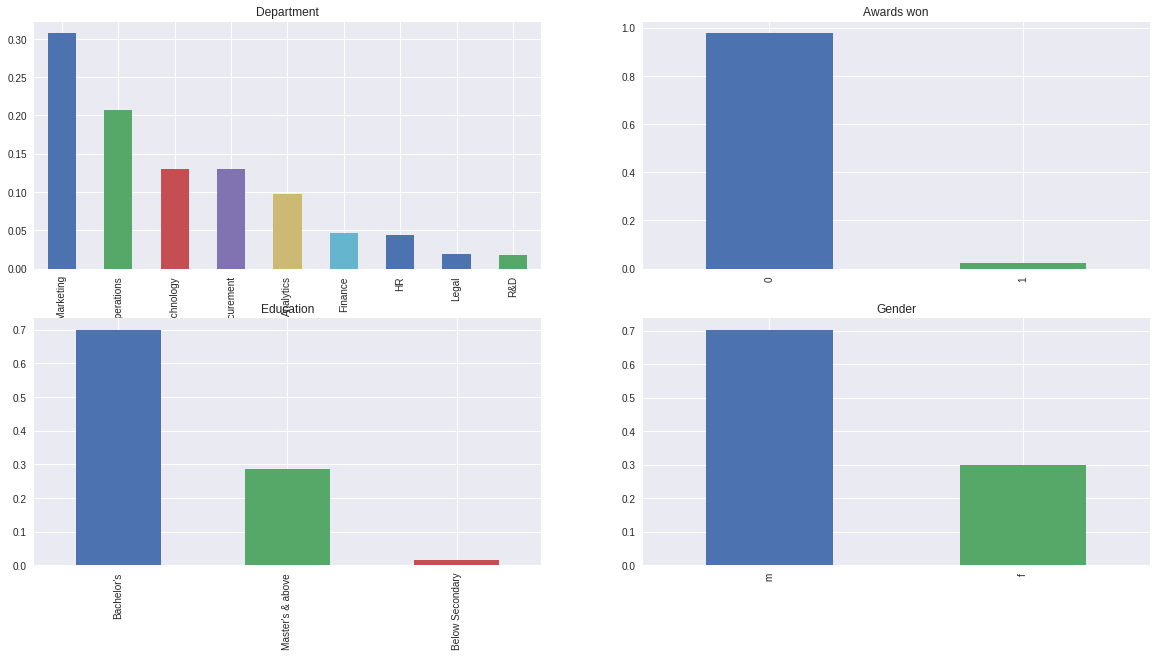

In [10]:
plt.figure(1)
plt.subplot(221)
train['department'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Department')

plt.subplot(222)
train['awards_won?'].value_counts(normalize=True).plot.bar(title= 'Awards won')

plt.subplot(223)
train['education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(224)
train['gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

plt.show()

In [0]:
# Most of the trainee are enrolled for Y and T program_type.
# More number of trainee enrolment for offline test than online test.
# Most of the test are easy in terms of difficulty level.

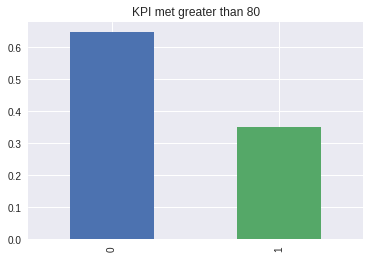

In [15]:
train['KPIs_met >80%'].value_counts(normalize=True).plot.bar(title= 'KPI met greater than 80')


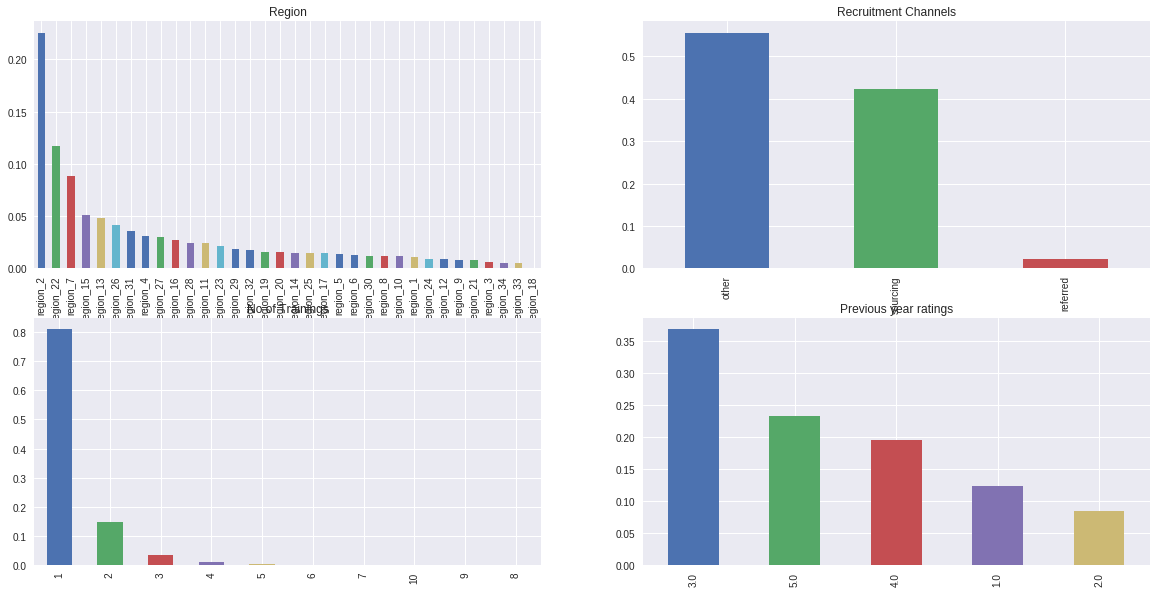

In [16]:
plt.figure(1)
plt.subplot(221)
train['region'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Region')

plt.subplot(222)
train['recruitment_channel'].value_counts(normalize=True).plot.bar(title='Recruitment Channels')

plt.subplot(223)
train['no_of_trainings'].value_counts(normalize=True).plot.bar(title= 'No of Trainings')

plt.subplot(224)
train['previous_year_rating'].value_counts(normalize=True).plot.bar(title= 'Previous year ratings')

plt.show()

In [0]:
# More male trainee as compared to female trainee
# Most of the trainee have diploma
# Most of the trainee belongs to tier 3 city
# 10% of the trainee are handicapped

#### Numerical Independent Variables

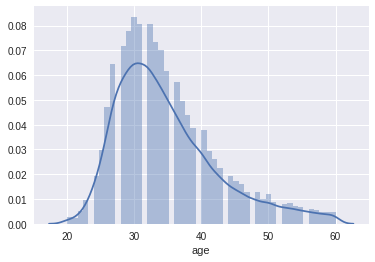

In [18]:
sns.distplot(train['age']);

In [0]:
# Most of the trainee are in the age range of 20-30 and 40-50

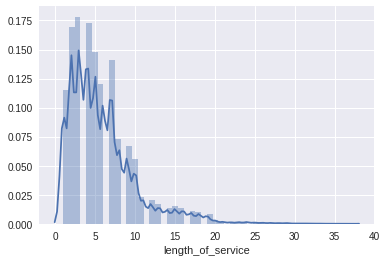

In [20]:
sns.distplot(train['length_of_service']);

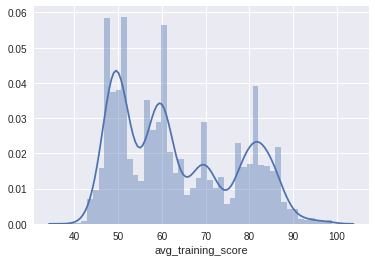

In [21]:
sns.distplot(train['avg_training_score']);

### Bivariate Analysis

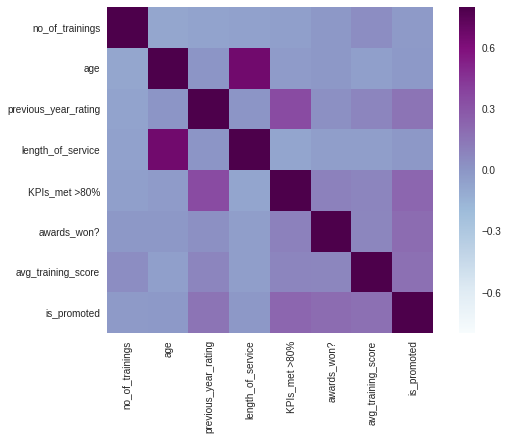

In [22]:
# Correlation between numerical variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [0]:
# Not much correlation between the variables

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


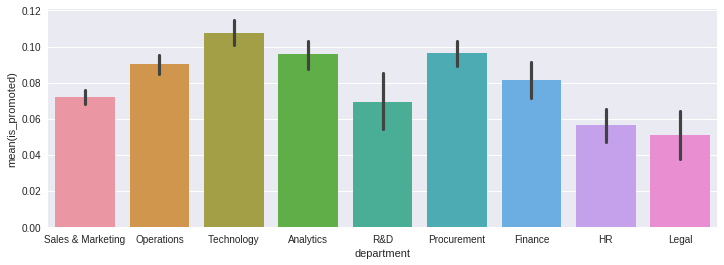

In [24]:
# program_id vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['department'], train['is_promoted'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


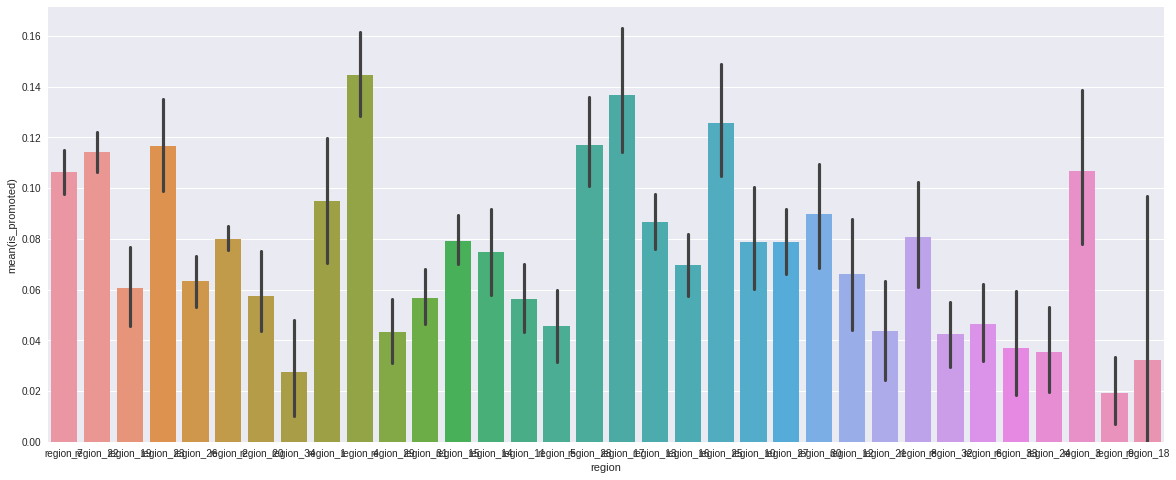

In [25]:
plt.figure(figsize=(20,8))
# program_type vs is_pass
sns.barplot(train['region'], train['is_promoted'])

In [0]:
# Trainee in X and Y program type have higher chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


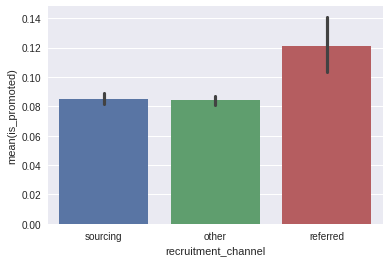

In [28]:
# test_type vs is_pass
sns.barplot(train['recruitment_channel'], train['is_promoted'])

In [0]:
# Trainee attending online mode of test have higher chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


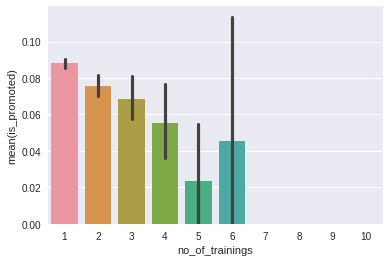

In [30]:
# difficulty_level vs is_pass
sns.barplot(train['no_of_trainings'], train['is_promoted'])

In [0]:
# If the difficulty level of the test is easy, chances to pass the test are higher

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


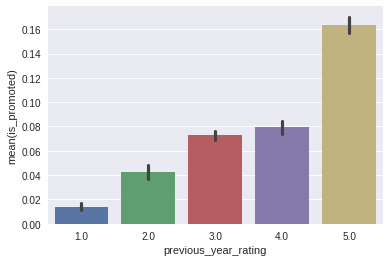

In [41]:
# Gender vs is_pass
sns.barplot(train['previous_year_rating'], train['is_promoted'])

In [0]:
# Gender does not affect the chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


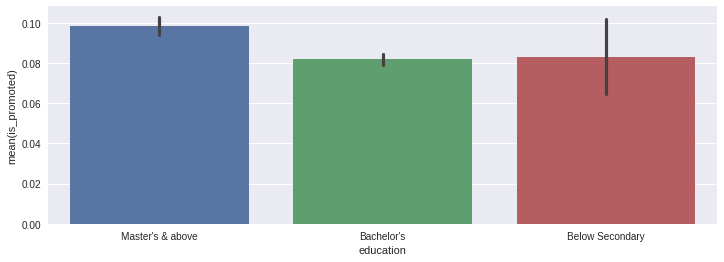

In [39]:
# education vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['education'], train['is_promoted'])

In [0]:
# Trainee with Masters education level have more chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


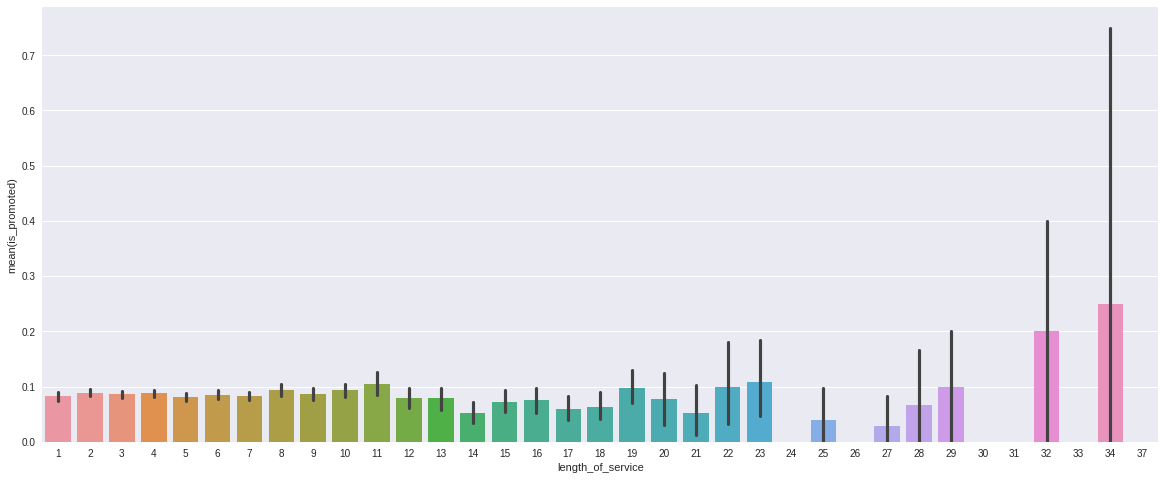

In [37]:
plt.figure(figsize=(20,8))
# is_handicapped vs is_pass
sns.barplot(train['length_of_service'], train['is_promoted'])

In [0]:
# Handicapped trainee have less chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


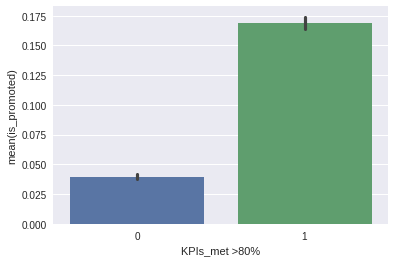

In [35]:
# city_tier vs is_pass
sns.barplot(train['KPIs_met >80%'], train['is_promoted'])

In [0]:
# Trainee from city tier 1 have higher chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


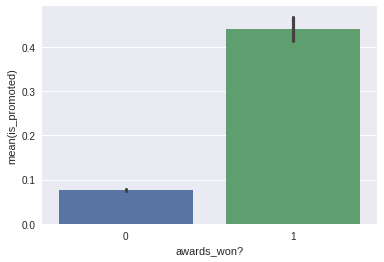

In [33]:
# trainee_engagement_rating vs is_pass
sns.barplot(train['awards_won?'], train['is_promoted'])

In [0]:
# As the trainee engagement rating increases, chances to pass the test also increases

### Missing Values Treatment

In [8]:
# Check the number of missing values in each variable
train.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [0]:
# age and trainee_engagement_rating variables have missing values in it.

In [9]:
test = pd.read_csv('test.csv')
test.drop('employee_id',inplace=True,axis = 1)
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [0]:
test['education'].fillna('other',inplace=True)
test['previous_year_rating'].fillna(99,inplace=True)

train['education'].fillna('other',inplace=True)
train['previous_year_rating'].fillna(99,inplace=True)

###Data preprocessing

In [11]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
# Save target variable in separate dataset
X = train.drop('is_promoted',axis=1)
y = train.is_promoted

In [13]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,99.0,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


### Catboost

In [0]:
categorical_features_indices = [0,1,2,3,4]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import f1_score

In [0]:
model = CatBoostClassifier(custom_loss=['F1'],random_seed=42,logging_level='Verbose')

In [0]:
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

In [0]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

In [43]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-F1-mean']),
    cv_data['test-F1-std'][np.argmax(cv_data['test-F1-mean'])],
    np.argmax(cv_data['test-F1-mean'])
))

Best validation accuracy score: 0.51±0.00 on step 934


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [44]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-F1-mean'])))

Precise validation accuracy score: 0.5086146649476074


In [0]:
params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'eval_metric': 'F1',
    'random_seed': 42,
    'logging_level': 'Verbose',
    'use_best_model': True
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)

In [0]:
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

In [77]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

KPIs_met >80%: 38.902573896954934
avg_training_score: 30.61396272195821
department: 14.720899566872356
previous_year_rating: 9.168643805731689
awards_won?: 2.1357846341850077
region: 1.5419610520743596
length_of_service: 1.4945361014257885
age: 0.5051389410839644
gender: 0.28820260891937655
education: 0.2686876892669022
no_of_trainings: 0.2193077905388801
recruitment_channel: 0.14030119098853253


In [68]:
print('Best model validation accuracy: {:.4}'.format(
    f1_score(y_validation,model.predict(X_validation))
))

Best model validation accuracy: 0.5052


In [0]:
import hyperopt

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=1000,
        eval_metric='F1',
        random_seed=42,
        logging_level='Verbose'
    )
    cv_params = model.get_params()
    cv_params.update({
      'loss_function': 'Logloss'
    })
    cv_data = cv(
        Pool(X, y, cat_features=categorical_features_indices),
        cv_params,
        plot=True
    )
    best_accuracy = np.max(cv_data['test-F1-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [0]:
from numpy.random import RandomState

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=RandomState(123)
)

print(best)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2183457	test: 0.2178443	best: 0.2178443 (0)	total: 592ms	remaining: 9m 51s
1:	learn: 0.3175566	test: 0.3173389	best: 0.3173389 (1)	total: 1.03s	remaining: 8m 34s
2:	learn: 0.2779062	test: 0.2745089	best: 0.3173389 (1)	total: 1.53s	remaining: 8m 29s
3:	learn: 0.3129076	test: 0.3127864	best: 0.3173389 (1)	total: 1.99s	remaining: 8m 15s
4:	learn: 0.3616162	test: 0.3554773	best: 0.3554773 (4)	total: 2.39s	remaining: 7m 56s
5:	learn: 0.3873057	test: 0.3812455	best: 0.3812455 (5)	total: 2.88s	remaining: 7m 57s
6:	learn: 0.3980671	test: 0.3913846	best: 0.3913846 (6)	total: 3.37s	remaining: 7m 57s
7:	learn: 0.4211300	test: 0.4157717	best: 0.4157717 (7)	total: 3.75s	remaining: 7m 44s
8:	learn: 0.4541243	test: 0.4491604	best: 0.4491604 (8)	total: 4.2s	remaining: 7m 41s
9:	learn: 0.4588835	test: 0.4518052	best: 0.4518052 (9)	total: 4.56s	remaining: 7m 31s
10:	learn: 0.4664756	test: 0.4604491	best: 0.4604491 (10)	total: 5.01s	remaining: 7m 30s
11:	learn: 0.4805574	test: 0.4743156	best:

In [0]:
model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=1000,
    eval_metric='F1',
    random_seed=42,
    logging_level='Verbose'
)
cv_data = cv(Pool(X, y, cat_features=categorical_features_indices), model.get_params(),plot=True)

In [0]:
print('Precise validation f1 score: {}'.format(np.max(cv_data['test-F1-mean'])))

In [0]:
model.fit(X, y, cat_features=categorical_features_indices)


In [0]:
pred = model.predict(test)

In [70]:
pred

array([0., 0., 0., ..., 0., 0., 1.])

### **Submission**

In [0]:
# Read the submission file
submission=pd.read_csv("sample_submission.csv")

In [48]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [0]:
pred=model.predict_proba(test)[:,1]


In [86]:
pred

array([1.72722155e-01, 1.55211733e-03, 5.11486146e-04, ...,
       6.56580915e-04, 6.32388104e-03, 9.49742937e-01])

In [0]:
# Fill the is_pass variable with the predictions
submission['is_promoted']=pred

In [0]:
submission['is_promoted'] = submission['is_promoted'].astype(np.int64)

In [73]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [74]:
submission['is_promoted'].value_counts()

0    22845
1      645
Name: is_promoted, dtype: int64

In [0]:
# Converting the submission file to csv format
submission.to_csv('cat_submission-basic3-es.csv', index=False)

In [0]:
from google.colab import files
files.download('cat_submission-basic3-es.csv')

score on leaderboard - 0.71145